# TODO

- Deterministic
    - Will probably want to use generators when paralleizing

- Need to store intersection points

- Specular reflection
    
    
- Optimization
    - Make the code faster...
    - Intersection check could be done using floating point calculation
    - What data to store
        - Need to store cound electrons reaching contacts!!!
    
    
- Ohmstats and colormap plotting
    - Ohmstats line
    - Ease, speed, and correctness
    
    
- Debugging
    - break full loop and return coords?

# Init

In [1]:
%%capture
import importlib
from cycler import cycler
import numpy as np
import time

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import sys
sys.path.insert(0, 'geo')
sys.path.insert(0, 'bandstructure')

import caustic_frame
importlib.reload(caustic_frame)

import caustic_bandstructure
importlib.reload(caustic_bandstructure)

from delafossite_bandstructure import delafossite

import monte_carlo_simulation as mcs
importlib.reload(mcs)
from shapely.geometry import LineString
from shapely.geometry import Point

# Set default plotting parameters

plt.rcParams['axes.prop_cycle'] = cycler(
    color=['#E24A33','#348ABD','#988ED5','#777777',
           '#FBC15E','#8EBA42','#FFB5B8'])

plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 1


plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize']=12

# Simulation

## Bar

In [2]:
k = delafossite()
bar_frame = caustic_frame.Frame('geo/bar.dxf')
bar_sim = mcs.Simulation(bar_frame, k, 0, 0.01, 10)
bar_sim.set_seed(0)

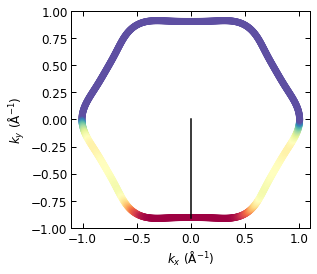

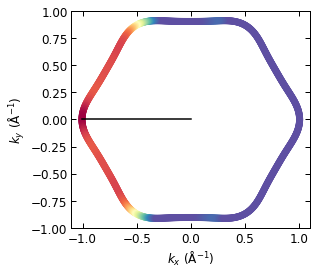

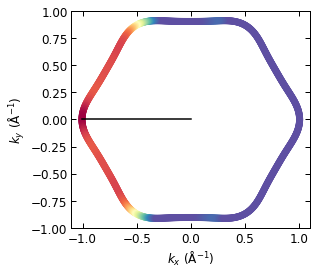

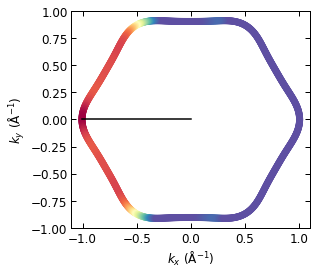

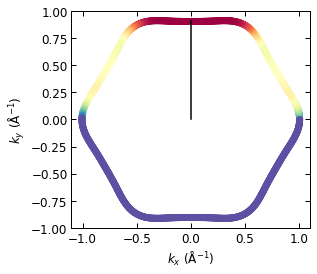

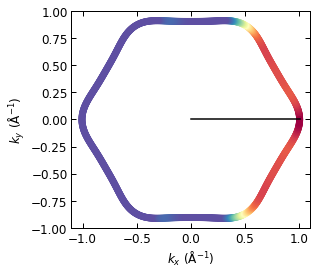

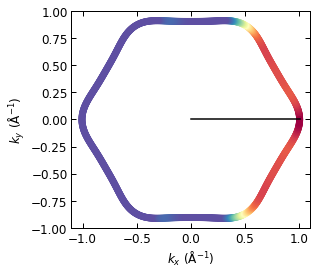

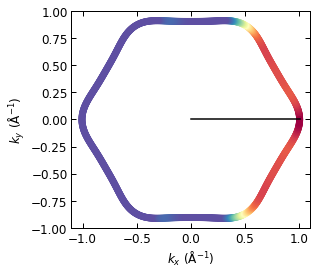

In [3]:
cmap = plt.get_cmap('Spectral_r')

for edge in bar_sim.frame.edges:
    max_p = np.max(edge.in_prob)
    colors = np.array([cmap(p/max_p) for p in edge.in_prob])
    colors = np.append(colors, [colors[0]], axis=0)
    
    fig, ax = plt.subplots()
    plt.plot((0, (np.max(bar_sim.bandstructure.k[0]*np.cos(edge.normal_angle)))*np.cos(edge.normal_angle)), (0, (np.max(bar_sim.bandstructure.k[1]*np.sin(edge.normal_angle)))*np.sin(edge.normal_angle)),'k')
    plt.scatter(bar_sim.bandstructure.k[0], bar_sim.bandstructure.k[1],c=colors)
    plt.xlabel(r'$k_x\ (\mathrm{\AA^{-1}})$')
    plt.ylabel(r'$k_y\ (\mathrm{\AA^{-1}})$')
    ax.set_aspect('equal')

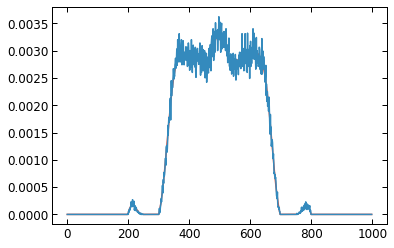

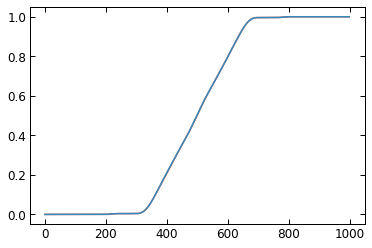

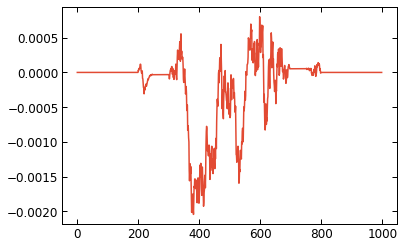

In [4]:
inds = []
n = 100000
freq = np.zeros(999)

for i in range(n):
    ind = bar_sim.frame.edges[1].get_injection_index()
    inds.append(ind)
    freq[ind[0]] += 1
    
prob = freq/n

plt.figure()
plt.plot(bar_sim.frame.edges[1].in_prob)
plt.plot(prob)

plt.figure()
plt.plot(bar_sim.frame.edges[1].cum_prob)
plt.plot(np.cumsum(prob))

plt.figure()
plt.plot(bar_sim.frame.edges[1].cum_prob-np.cumsum(prob))

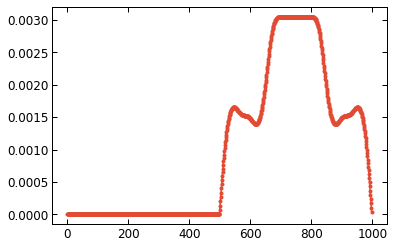

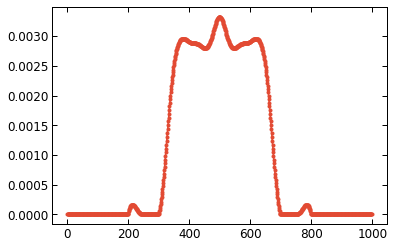

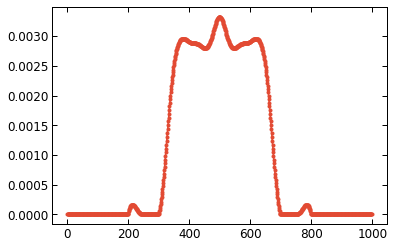

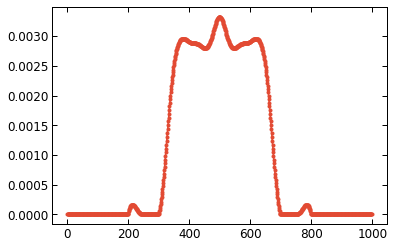

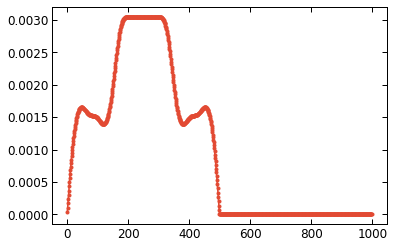

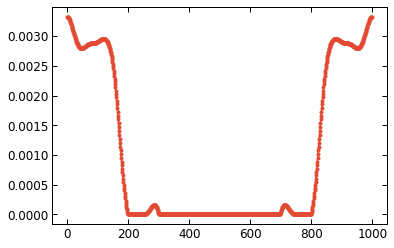

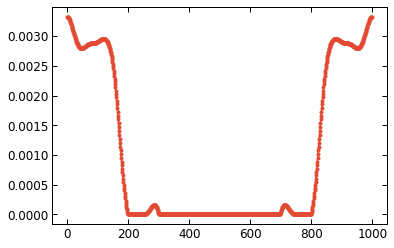

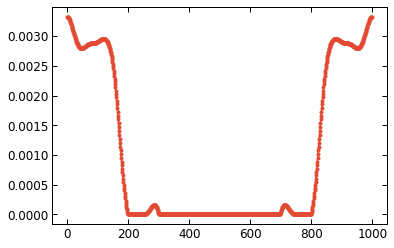

In [5]:
for edge in bar_sim.frame.edges:
    plt.figure()
    plt.plot(edge.in_prob,'.-')


4.033279618817771
4.033544949345924


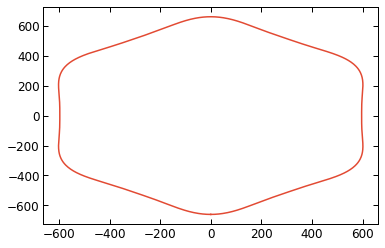

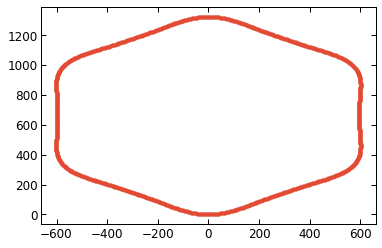

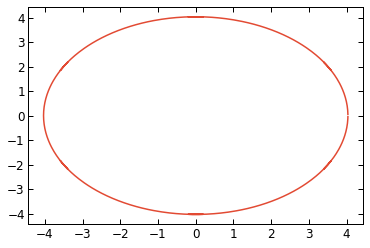

In [6]:
plt.figure()
plt.plot(bar_sim.bandstructure.r[0], bar_sim.bandstructure.r[1])

plt.figure()
plt.plot(np.cumsum(np.diff(bar_sim.bandstructure.r[0])), np.cumsum(np.diff(bar_sim.bandstructure.r[1])),'.')



plt.figure()
plt.plot(bar_sim.bandstructure.dr[0], bar_sim.bandstructure.dr[1])

print(np.max(bar_sim.bandstructure.dr[0]))
print(np.max(bar_sim.bandstructure.dr[1]))

In [7]:
test = [((320, 0.391651302717245), -0.05857620471278968, -5.0)]
test[-1][0]

(320, 0.391651302717245)

In [8]:
t0 = time.time()
bar_trajectories = bar_sim.run_simulation(debug=True)
t1 = time.time()
print(t1-t0)

0.20350933074951172


In [9]:
bar_trajectories[0]

[((425, 0.5392902228232309), -0.04230848793584874, -4.9999999999),
 ((32, 0.8304568449671279), -0.4999999999136172, -4.733072631199907),
 ((570, 0.28378133491588975), 0.4999999999133786, -4.1562245761997),
 ((571, 1), -0.48680137141351865, -4.736254302828221),
 ((15, 0.5953426635857948), -0.49999999991372496, -4.743989588232369),
 ((594, 0.5111060851898377), 0.49999999990496563, -4.416527411800793),
 ((595, 1), -0.4999999999130429, -4.984403283738586),
 ((334, 0.5099594910269473), -0.26182323878032954, -4.9999999999),
 ((875, 0.00501616729854748), -0.49999999994711547, -4.617761827489285),
 ((876, 1), -0.482038367213246, -4.627075861671501),
 ((877, 1), 0.23987969391713462, -4.999999999954104),
 ((9, 0.25495177614151765), 0.16595759460304826, -4.9999999999),
 ((10, 1), 0.4999999999020813, -4.930761223886508),
 ((344, 0.6723418983161016), -0.3530329136387501, -4.9999999999),
 ((131, 0.2969167552125721), -0.4999999999305816, -4.847610234165528),
 ((471, 0.9186059335894914), 0.49999999991

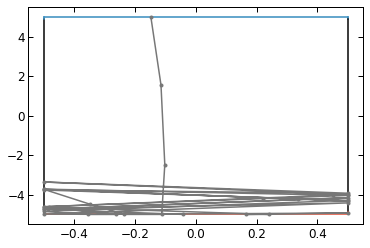

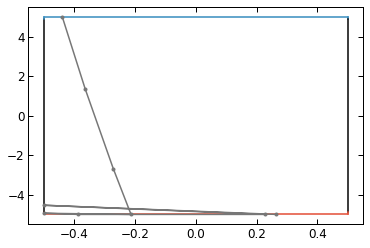

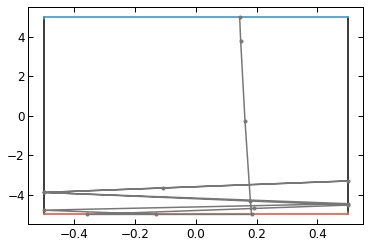

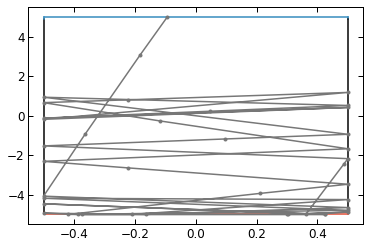

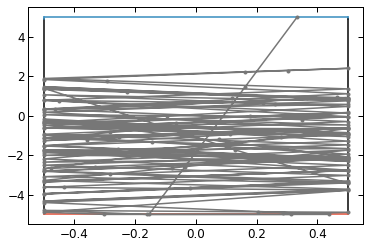

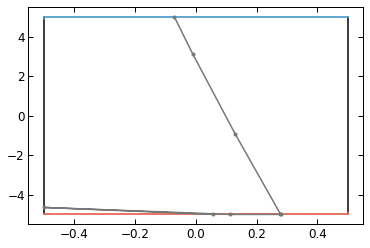

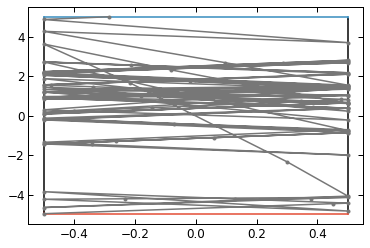

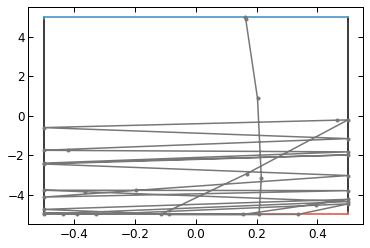

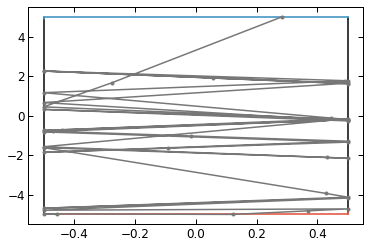

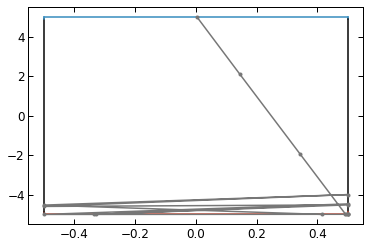

In [25]:

for trajectory in bar_trajectories:
    fig = bar_frame.gen_fig()
    ns, xs, ys = zip(*trajectory)
    plt.plot(xs,ys, 'C3.-')
    #plt.axes().set_aspect('equal')
    #plt.ylim(-5.1,-4)

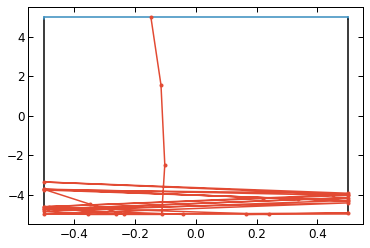

In [11]:
fig = bar_frame.gen_fig()
ns, xs, ys = zip(*bar_trajectories[0])
plt.plot(xs,ys, '.-')
#plt.ylim(-5.1,-4)

In [12]:
ns

((425, 0.5392902228232309),
 (32, 0.8304568449671279),
 (570, 0.28378133491588975),
 (571, 1),
 (15, 0.5953426635857948),
 (594, 0.5111060851898377),
 (595, 1),
 (334, 0.5099594910269473),
 (875, 0.00501616729854748),
 (876, 1),
 (877, 1),
 (9, 0.25495177614151765),
 (10, 1),
 (344, 0.6723418983161016),
 (131, 0.2969167552125721),
 (471, 0.9186059335894914),
 (991, 0.9889583490130748),
 (366, 0.6499207017656201),
 (957, 0.9086734832723956),
 (558, 0.014243907683529233),
 (559, 1),
 (90, 0.20570341678021753),
 (91, 1),
 (484, 0.8641530376647516),
 (932, 0.3074005111202536),
 (430, 0.04721796892709729),
 (431, 1),
 (816, 0.192076822952023),
 (817, 1),
 (818, 1),
 (198, 0.624213225685351),
 (199, 1),
 (200, 1),
 (201, 1))

## TEF

In [13]:
k = delafossite()
frame = caustic_frame.Frame('geo/tef.dxf')
sim = mcs.Simulation(frame, k, 0, 0.01, 10)
sim.set_seed(1)

In [14]:
t0 = time.time()
trajectories = sim.run_simulation(debug=True)
t1 = time.time()
print(t1-t0)

1.1796810626983643


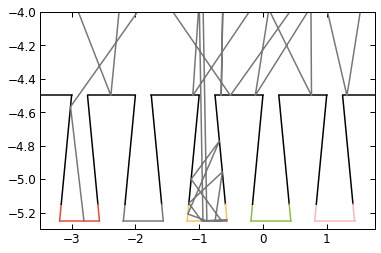

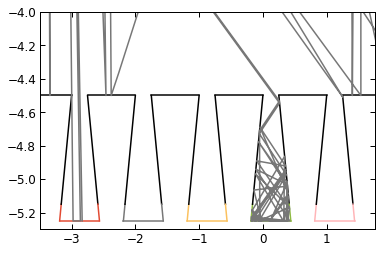

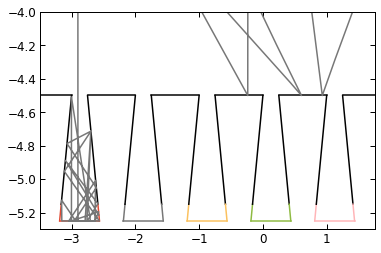

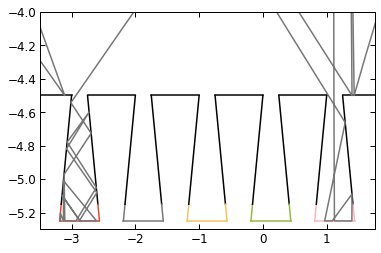

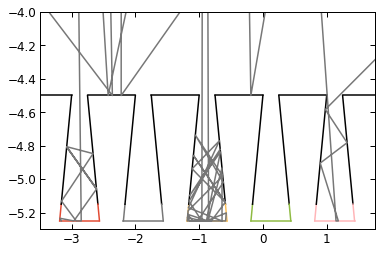

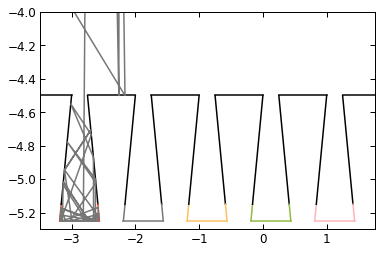

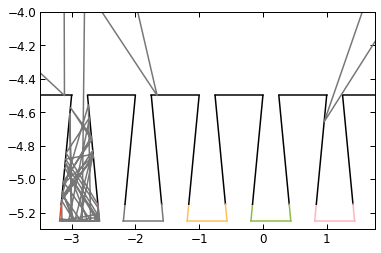

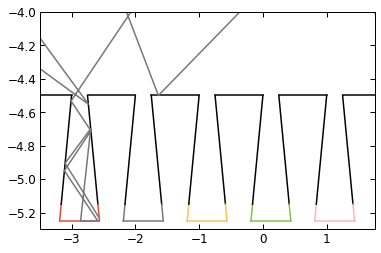

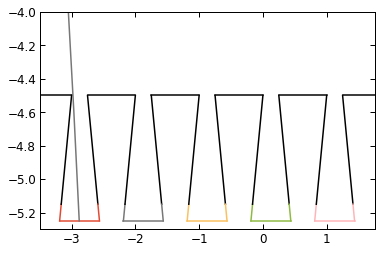

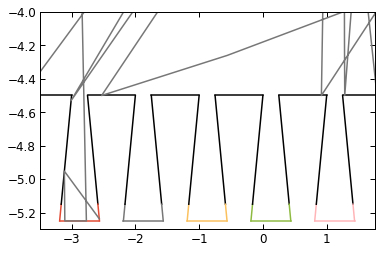

In [15]:
for trajectory in trajectories:
    fig = frame.gen_fig()
    ns, xs, ys = zip(*trajectory)
    plt.plot(xs,ys, 'C3')
    plt.xlim(-3.5, 1.75)
    plt.ylim(-5.3, -4)

(-5.3, -4.4)

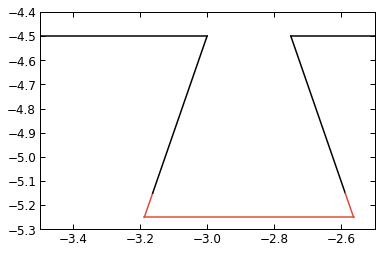

In [16]:
fig = frame.gen_fig()
ns, xs, ys = zip(*trajectories[4])
#plt.plot(xs,ys, 'C3')
plt.plot(xs[68:72],ys[68:72], 'C0')
plt.xlim(-3.5, -2.5)
plt.ylim(-5.3, -4.4)

In [17]:
sim.frame.edges

[((-10.5, 4.5), (-8.0, 4.5), 0),
 ((-8.0, 4.5), (-8.0, 9.4), 0),
 ((-8.0, 9.4), (-8.0, 9.5), 2),
 ((-8.0, 9.5), (-5.0, 9.5), 2),
 ((-5.0, 9.5), (-5.0, 9.4), 2),
 ((-5.0, 9.4), (-5.0, 4.5), 0),
 ((-5.0, 4.5), (3.0, 4.5), 0),
 ((3.0, 4.5), (3.0, 9.4), 0),
 ((3.0, 9.4), (3.0, 9.5), 3),
 ((3.0, 9.5), (6.0, 9.5), 3),
 ((6.0, 9.5), (6.0, 9.4), 3),
 ((6.0, 9.4), (6.0, 4.5), 0),
 ((6.0, 4.5), (10.5, 4.5), 0),
 ((10.5, 4.5), (10.5, -4.5), 0),
 ((10.5, -4.5), (1.25, -4.5), 0),
 ((1.25, -4.5), (1.4125, -5.15), 0),
 ((1.4125, -5.15), (1.4375, -5.25), 7),
 ((1.4375, -5.25), (0.8125, -5.25), 7),
 ((0.8125, -5.25), (0.8374999999999999, -5.15), 7),
 ((0.8374999999999999, -5.15), (1.0, -4.5), 0),
 ((1.0, -4.5), (0.25, -4.5), 0),
 ((0.25, -4.5), (0.4125000000000001, -5.15), 0),
 ((0.4125000000000001, -5.15), (0.4375, -5.25), 6),
 ((0.4375, -5.25), (-0.1875, -5.25), 6),
 ((-0.1875, -5.25), (-0.1625000000000001, -5.15), 6),
 ((-0.1625000000000001, -5.15), (0.0, -4.5), 0),
 ((0.0, -4.5), (-0.75, -4.5), 0),

((307, 0.9110912732683777), (308, 1), (309, 1), (310, 1), (311, 1))
(-6.746601122162196, -6.982592126053939, -7.288984177888958, -7.645717065639653, -7.878821556057581)
(-4.499999999948648, -0.8326654909292892, 3.189225715694929, 7.2069573322742695, 9.499999999900513)

inputs
(310, 1) -7.645717065639653 7.2069573322742695
update position
(311, 1) -8.053651262143555 11.219795165171432

intersection stuff
[(((-8.0, 9.5), (-5.0, 9.5), 2), -7.878821556057581, 9.499999999900513, 2.304860598606233)]
(((-8.0, 9.5), (-5.0, 9.5), 2), -7.878821556057581, 9.499999999900513, 2.304860598606233)
2 -7.878821556057581 9.499999999900513

shapely checks
True
False
True
True

step_position


([((311, 1), -7.878821556057581, 9.499999999900513)], False)

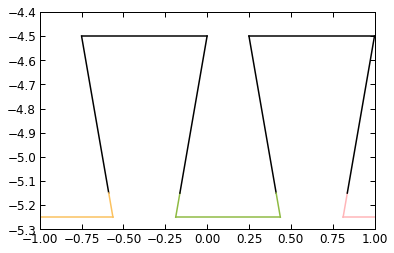

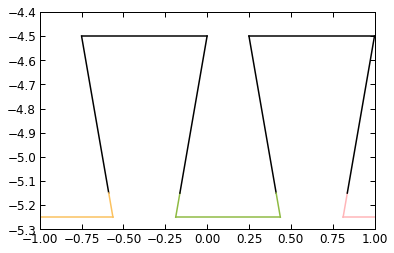

In [18]:
trajectories[1][-1]
ns, xs, ys = zip(*trajectories[1])

print(ns[-5:])
print(xs[-5:])
print(ys[-5:])

ind = -2
print('')
print('inputs')
print(ns[ind], xs[ind], ys[ind])
n_up, x_up, y_up = sim.update_position(ns[ind], xs[ind], ys[ind])
print('update position')
print(n_up, x_up, y_up)


line_step = LineString([(xs[ind], ys[ind]), (x_up, y_up)])
intersections = sim.get_sorted_intersections(line_step)

vec = np.array([(x_up-xs[ind]), (y_up-ys[ind])])/np.sqrt((x_up-xs[ind])**2 +(y_up-ys[ind])**2)
print('')
print('intersection stuff')
print(intersections)
print(intersections[0])
edge, x_new, y_new, _ = intersections[0]
print(edge.layer, x_new, y_new)


print('')
print('shapely checks')
print(sim.frame.body.intersects(Point(xs[ind], ys[ind])))
print(sim.frame.body.intersects(Point(x_up, y_up)))
print(sim.frame.body.intersects(Point(x_new, y_new)))
print(sim.frame.body.intersects(Point([x_new, y_new]-1E-15*vec)))

fig = frame.gen_fig()
plt.plot(xs[-10:],ys[-10:],'.-')
plt.plot([xs[ind], x_up], [ys[ind], y_up],'.-k')
plt.xlim(-1, 1)
plt.ylim(-5.3, -4.4)


fig = frame.gen_fig()
plt.plot(xs[-3:],ys[-3:], '.-')
plt.plot(xs[-3],ys[-3], 'g.', markersize=12)
plt.plot(xs[-2],ys[-2], 'b.', markersize=12)
plt.plot(xs[-2]-1E-10*vec[0],ys[-2]-1E-10*vec[1], 'r.', markersize=12)
plt.plot([xs[ind], x_new], [ys[ind], y_new],'.-k')
plt.xlim(-1, 1)
plt.ylim(-5.3, -4.4)


print('')
print('step_position')
sim.step_position(ns[ind], xs[ind], ys[ind])

In [19]:
n_f = (173, 0.25031344146242784)
x = -2.749411058924586
y = -5.25
dr = np.array([1.46095278, 3.75949037])
[x,y] + n_f[1]*dr

array([-2.38371494, -4.30894903])

In [20]:
sim.step_position((276,1), 0.5, -5)


Previous step stepped out of bounds
(276, 1) 0.5 -5


([((276, 1), 0.5, -5)], False)

In [21]:
line_step = LineString([(0.5, -5), (0.5001522540877086, -4.995969331642936)])
sim.get_intersections(line_step)

[]

In [22]:
x = 0.49
y = -4.9

line_step = LineString([(0.49, -4.9),(0.49, -5)])
intersections = sim.get_sorted_intersections(line_step)
list(intersections)

[]

In [23]:
line_step = LineString([(0.51, -4.),(0.49, -5.1)])
intersections = sim.get_sorted_intersections(line_step)
intersections

[(((1.0, -4.5), (0.25, -4.5), 0),
  0.5009090909109087,
  -4.499999999900017,
  0.5000826376990937)]

In [24]:
freq = np.zeros(999)
n = 1000
for i in range(n):
    line_step = LineString([(0.49, -4.9),(0.5, -5)])
    intersections = sim.get_sorted_intersections(line_step)
    edge_0, x_new, y_new, _ = intersections[0]
    edge_1, _, _, _ = intersections[1]
    n_new, f_new = sim.corner_scatter(edge_0, edge_1)
    freq[n_new] += 1
    if edge_0.in_prob[n_new] <= 0 or edge_1.in_prob[n_new] <= 0:
        print(n_new)
    
prob = freq/n
fig = plt.figure()
plt.plot(edge_0.cum_prob)
plt.plot(edge_1.cum_prob)
plt.plot(np.cumsum(prob))

fig = plt.figure()
plt.plot(edge_0.in_prob)
plt.plot(edge_1.in_prob)
plt.plot(prob)

IndexError: list index out of range

# Corner handling




- Propagating into a corner
    - exterior corner vs interior corner
        - Exterior corner:
            - What are the edge layers?
            - If scattering, take some convolved pld
        - Interior corner
            - Probably some convolution again
    - current code will return both edges being hit
    
    
    
- Convolving plds:
    - cumsum(pld_1 * pld_2)/sum(pld_1 * pld_2)?

- Injecting from corner
    - Could reject corner injection
        - This should be fine to do
        - np.random.rand chooses in [0,1)
    - Know this is an injection event and check collision with the corner
        - Requires rewriting get_intersection
    - When injecting, know you are injecting from the corner
        - Separate function corner check?
        - Choose stated from convolved probability dists

In [ ]:
r = np.random.rand()

cum_prob = sim.frame.edges[0].cum_prob

n = np.argmax(sim.frame.edges[0].cum_prob > r)
print(n, r, cum_prob[n-1], cum_prob[n])

In [ ]:
remainder = (r-cum_prob[n-1])/(cum_prob[n] - cum_prob[n-1])
print(n-1+remainder)
print(cum_prob[n] - cum_prob[n-1])
print(r - cum_prob[n-1])
ind = n-1+remainder

In [ ]:
cum_prob[-2]

In [ ]:
from geo.caustic_frame import Edge
Edge.compute_injection_index(cum_prob)

In [ ]:
np.shape(cum_prob)

In [ ]:
np.floor(ind)

In [ ]:
(1- (ind - np.floor(ind)))* sim.bandstructure.dr[:, int(np.floor(ind))]

In [ ]:
999.5 % 999

In [ ]:
x = [1, 2 ,3, 5]
cumsum = np.cumsum(x)
cumsum

In [ ]:
np.argmax(cumsum < 0.5)

Before:
n = np.argmax(cum_sum > rand)
Returns first index of cum_sum that is bigger than rand

Step was then dr[:, n]

Now want to return fractional index that corresponds to r (which is in range of (n-1, n))

this maps to (ceil(n)-n) * dr[:, ceil(n)]?
Needs correct modulo


(n, f) = 